In [83]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

Leitura do csv e apresentação de suas 5 primeiras linhas.

In [85]:
pd.options.display.max_columns = None

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student-por.csv')

display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Visando melhor avaliação, traduziremos as colunas para português.

In [86]:
columns = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
    'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
    'G1', 'G2', 'G3'
    ]

In [87]:
columns_dictionary = {
    'school': 'escola',
    'sex': 'sexo',
    'age': 'idade',
    'address': 'endereco',
    'famsize': 'tamanho_familia',
    'Pstatus': 'status_pais',
    'Medu': 'educ_mae',
    'Fedu': 'educ_pai',
    'Mjob': 'trabalho_mae',
    'Fjob': 'trabalho_pai',
    'reason': 'motivo',
    'guardian': 'responsavel',
    'traveltime': 'tempo_viagem_ate_escola',
    'studytime': 'tempo_estudo',
    'failures': 'reprovacoes',
    'schoolsup': 'suporte_escola',
    'famsup': 'suporte_familia',
    'paid': 'aulas_pagas',
    'activities': 'atividades',
    'nursery': 'creche',
    'higher': 'educ_superior',
    'internet': 'internet',
    'romantic': 'relacionamento',
    'famrel': 'relacoes_familiares',
    'freetime': 'tempo_livre',
    'goout': 'sair',
    'Dalc': 'alcool_semana',
    'Walc': 'alcool_fds',
    'health': 'saude',
    'absences': 'faltas',
    'G1': 'nota_periodo1',
    'G2': 'nota_periodo2',
    'G3': 'nota_final'
}

df = df.rename(columns = columns_dictionary)

display(df.head())

,escola,sexo,idade,endereco,tamanho_familia,status_pais,educ_mae,educ_pai,trabalho_mae,trabalho_pai,motivo,responsavel,tempo_viagem_ate_escola,tempo_estudo,reprovacoes,suporte_escola,suporte_familia,aulas_pagas,atividades,creche,educ_superior,internet,relacionamento,relacoes_familiares,tempo_livre,sair,alcool_semana,alcool_fds,saude,faltas,nota_periodo1,nota_periodo2,nota_final
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Vamos verificar se há valores ausentes na tabela.

In [88]:
display(df.isnull().sum())

,0
escola,0
sexo,0
idade,0
endereco,0
tamanho_familia,0
status_pais,0
educ_mae,0
educ_pai,0
trabalho_mae,0
trabalho_pai,0


Vamos converter as variáveis categóricas em numéricas.

In [89]:
binary_columns = ['escola', 'sexo', 'endereco', 'tamanho_familia', 'status_pais', 'suporte_escola', 'suporte_familia', 'aulas_pagas', 'atividades', 'creche', 'educ_superior', 'internet', 'relacionamento']

label_encoder = LabelEncoder()
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

nominal_columns = ['trabalho_mae', 'trabalho_pai', 'motivo', 'responsavel']
df = pd.get_dummies(df, columns=nominal_columns)

columns_dummies_dictionary = {
    'trabalho_mae_health': 'trabalho_mae_saude',
    'trabalho_mae_other': 'trabalho_mae_outro',
    'trabalho_mae_services': 'trabalho_mae_servicos',
    'trabalho_mae_teacher': 'trabalho_mae_professor',
    'trabalho_pai_health': 'trabalho_pai_saude',
    'trabalho_pai_other': 'trabalho_pai_outro',
    'trabalho_pai_services': 'trabalho_pai_servicos',
    'trabalho_pai_teacher': 'trabalho_pai_professor',
    'motivo_home': 'motivo_proximo_de_casa',
    'motivo_other': 'motivo_outro',
    'motivo_reputation': 'motivo_reputacao',
    'motivo_course': 'motivo_curso',
    'responsavel_mother': 'responsavel_mae',
    'responsavel_other': 'responsavel_outro'
}

df = df.rename(columns = columns_dummies_dictionary)

binary_columns = df.select_dtypes(include=['bool']).columns
df[binary_columns] = df[binary_columns].astype(int)

display(df.head())

,escola,sexo,idade,endereco,tamanho_familia,status_pais,educ_mae,educ_pai,tempo_viagem_ate_escola,tempo_estudo,reprovacoes,suporte_escola,suporte_familia,aulas_pagas,atividades,creche,educ_superior,internet,relacionamento,relacoes_familiares,tempo_livre,sair,alcool_semana,alcool_fds,saude,faltas,nota_periodo1,nota_periodo2,nota_final,trabalho_mae_at_home,trabalho_mae_saude,trabalho_mae_outro,trabalho_mae_servicos,trabalho_mae_professor,trabalho_pai_at_home,trabalho_pai_saude,trabalho_pai_outro,trabalho_pai_servicos,trabalho_pai_professor,motivo_curso,motivo_proximo_de_casa,motivo_outro,motivo_reputacao,responsavel_father,responsavel_mae,responsavel_outro
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


Algumas estatísticas.

In [90]:
df_dropped_categoric_columns = df.drop(columns = [col for col in df.columns if 'trabalho_mae' in col or 'trabalho_pai' in col or 'motivo' in col or 'responsavel' in col])

display(round(df_dropped_categoric_columns.describe(), 2))

,escola,sexo,idade,endereco,tamanho_familia,status_pais,educ_mae,educ_pai,tempo_viagem_ate_escola,tempo_estudo,reprovacoes,suporte_escola,suporte_familia,aulas_pagas,atividades,creche,educ_superior,internet,relacionamento,relacoes_familiares,tempo_livre,sair,alcool_semana,alcool_fds,saude,faltas,nota_periodo1,nota_periodo2,nota_final
count,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.0,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00,649.00
mean,0.35,0.41,16.74,0.70,0.30,0.88,2.51,2.31,1.57,1.93,0.22,0.10,0.61,0.06,0.49,0.8,0.89,0.77,0.37,3.93,3.18,3.18,1.50,2.28,3.54,3.66,11.40,11.57,11.91
std,0.48,0.49,1.22,0.46,0.46,0.33,1.13,1.10,0.75,0.83,0.59,0.31,0.49,0.24,0.50,0.4,0.31,0.42,0.48,0.96,1.05,1.18,0.92,1.28,1.45,4.64,2.75,2.91,3.23
min,0.00,0.00,15.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,16.00,0.00,0.00,1.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,2.00,0.00,10.00,10.00,10.00
50%,0.00,0.00,17.00,1.00,0.00,1.00,2.00,2.00,1.00,2.00,0.00,0.00,1.00,0.00,0.00,1.0,1.00,1.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,12.00
75%,1.00,1.00,18.00,1.00,1.00,1.00,4.00,3.00,2.00,2.00,0.00,0.00,1.00,0.00,1.00,1.0,1.00,1.00,1.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
max,1.00,1.00,22.00,1.00,1.00,1.00,4.00,4.00,4.00,4.00,3.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,5.00,5.00,5.00,5.00,5.00,5.00,32.00,19.00,19.00,19.00


Histogramas:

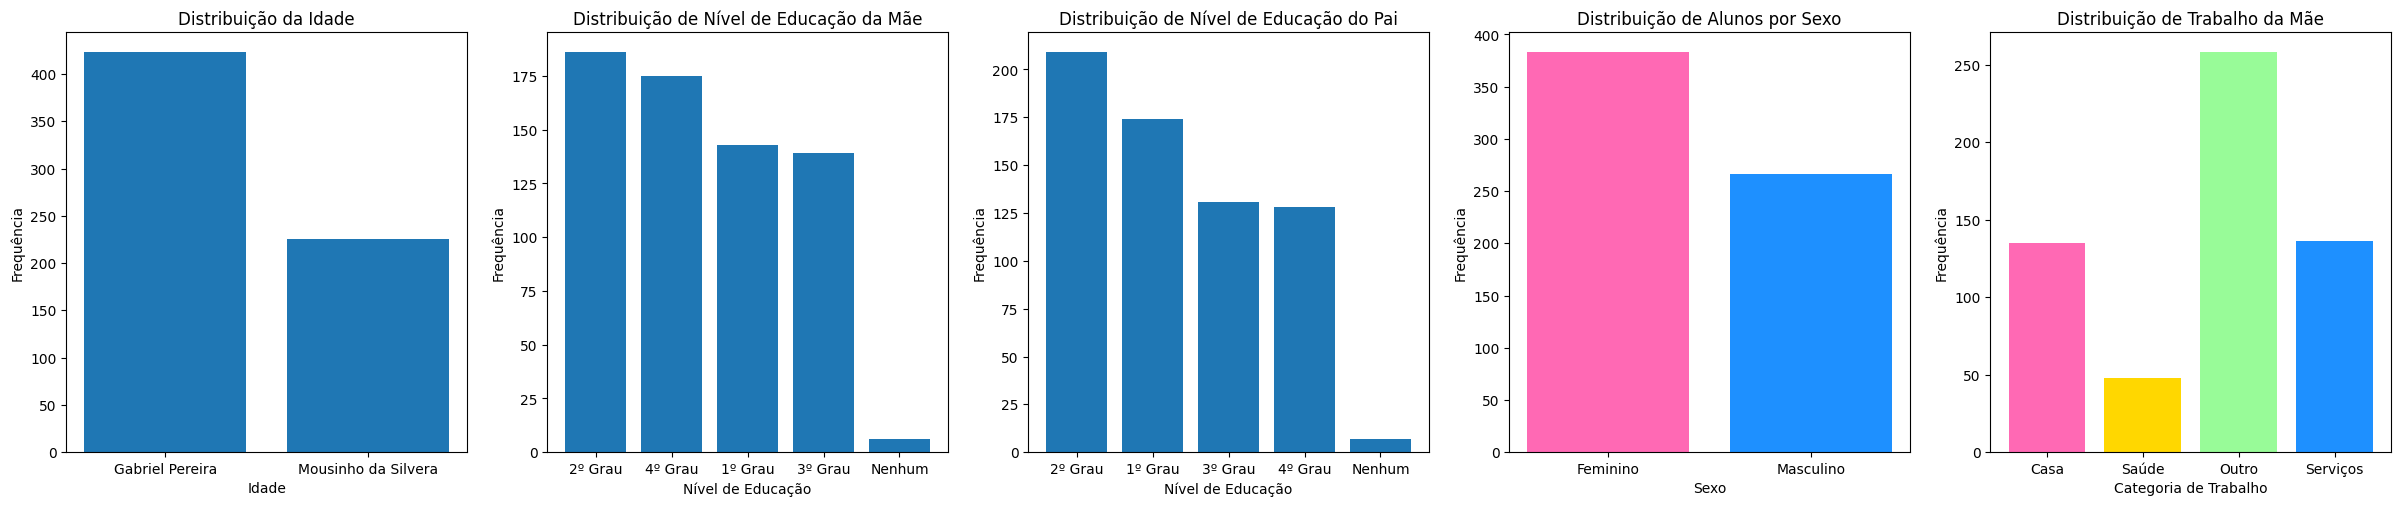

In [91]:
plt.figure(figsize=(30, 12))

frequency_escola = df['escola'].value_counts()
plt.subplot(2, 5, 1)
plt.bar(frequency_escola.index.map({0: 'Gabriel Pereira', 1: 'Mousinho da Silvera'}), frequency_escola.values)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

frequency_educ_mae = df['educ_mae'].value_counts()
plt.subplot(2, 5, 2)
plt.bar(frequency_educ_mae.index.map({0: 'Nenhum', 1: '1º Grau', 2: '2º Grau', 3: '3º Grau', 4: '4º Grau'}), frequency_educ_mae.values)
plt.title('Distribuição de Nível de Educação da Mãe')
plt.xlabel('Nível de Educação')
plt.ylabel('Frequência')

frequency_educ_pai = df['educ_pai'].value_counts()
plt.subplot(2, 5, 3)
plt.bar(frequency_educ_pai.index.map({0: 'Nenhum', 1: '1º Grau', 2: '2º Grau', 3: '3º Grau', 4: '4º Grau'}), frequency_educ_pai.values)
plt.title('Distribuição de Nível de Educação do Pai')
plt.xlabel('Nível de Educação')
plt.ylabel('Frequência')

frequency_sex = df['sexo'].value_counts()
plt.subplot(2, 5, 4)
plt.bar(frequency_sex.index.map({0: 'Feminino', 1: 'Masculino'}), frequency_sex.values, color=['#FF69B4', '#1E90FF'])
plt.title('Distribuição de Alunos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frequência')

trabalho_mae_labels = {
    'trabalho_mae_at_home': 'Casa',
    'trabalho_mae_saude': 'Saúde',
    'trabalho_mae_outro': 'Outro',
    'trabalho_mae_servicos': 'Serviços'
}

trabalho_mae_columns = list(trabalho_mae_labels.keys())
frequency_trab_mae = df[trabalho_mae_columns].sum()
plt.subplot(2, 5, 5)
plt.bar([trabalho_mae_labels[col] for col in trabalho_mae_columns], frequency_trab_mae.values, color=['#FF69B4', '#FFD700', '#98FB98', '#1E90FF'])
plt.title('Distribuição de Trabalho da Mãe')
plt.xlabel('Categoria de Trabalho')
plt.ylabel('Frequência')
plt.show()

Verificando correlação entre as variáveis.

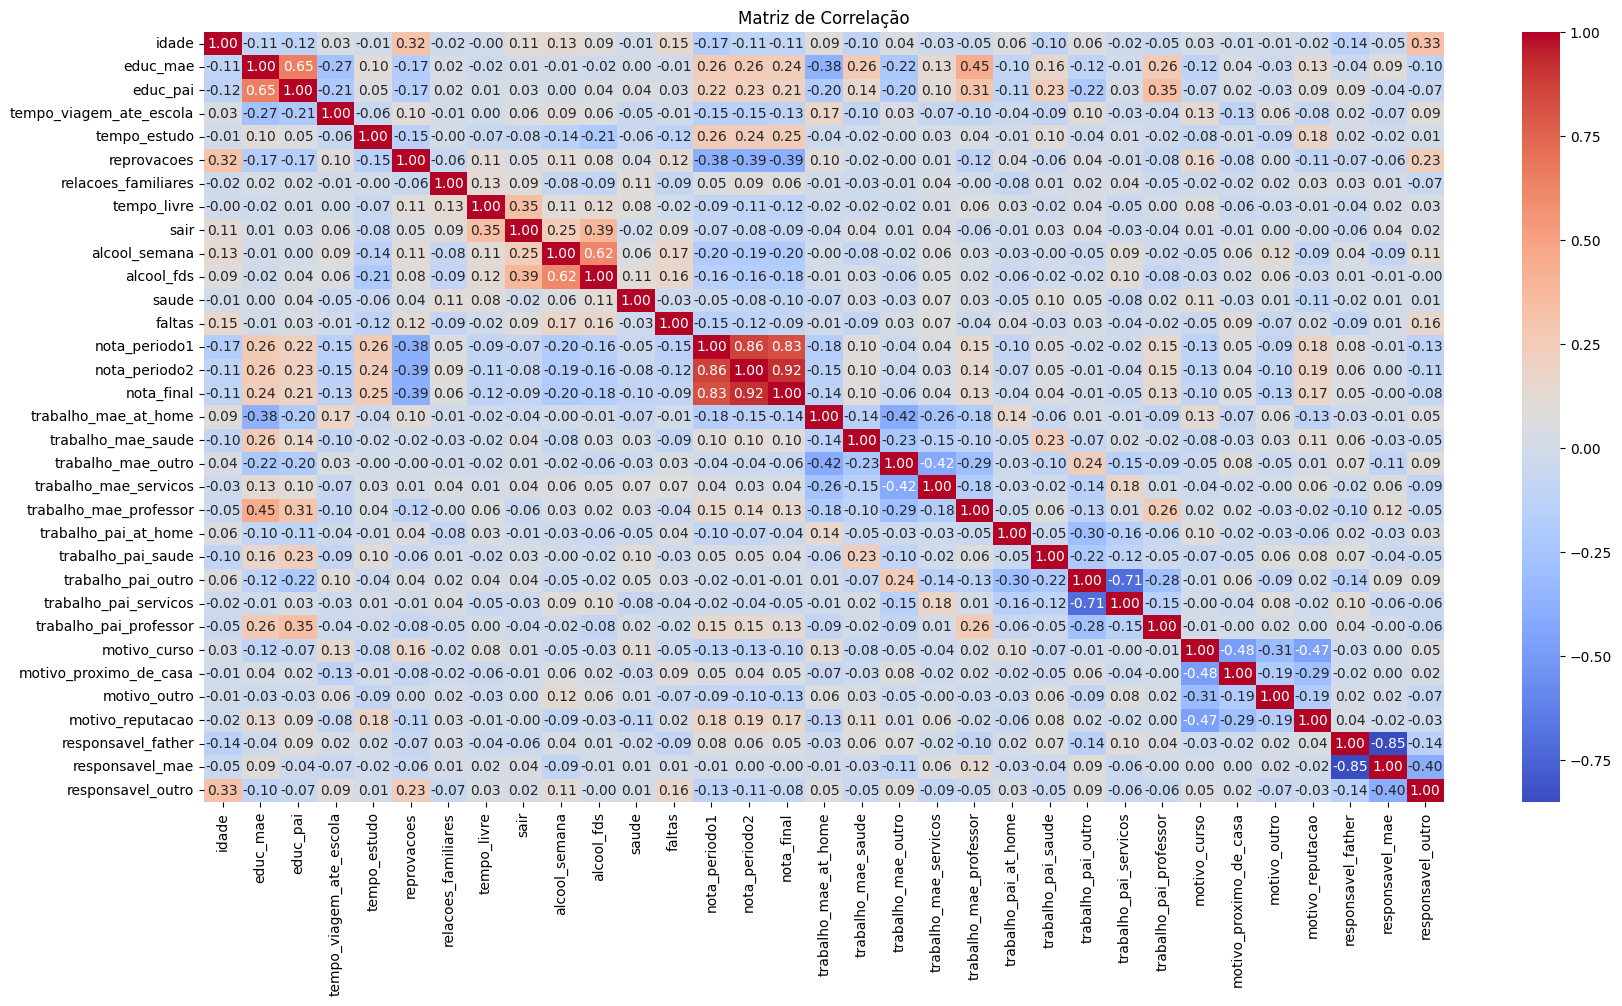

In [92]:
binary_columns = ['escola', 'sexo', 'endereco', 'tamanho_familia', 'status_pais', 'suporte_escola', 'suporte_familia', 'aulas_pagas', 'atividades', 'creche', 'educ_superior', 'internet', 'relacionamento']

df_numeric = df.drop(columns=binary_columns, errors='ignore')

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()


Modelagem e treinamento:

In [108]:
columns_to_drop = [
    'suporte_escola', 'suporte_familia', 'tempo_viagem_ate_escola',
    'alcool_semana', 'alcool_fds', 'saude', 'atividades',
    'reprovacoes', 'motivo', 'motivo_curso', 'motivo_proximo_de_casa', 'motivo_outro', 'motivo_reputacao' , 'responsavel', 'responsavel_father', 'responsavel_mae', 'responsavel_outro'
]

df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

display(df_cleaned.head())

threshold = df_cleaned['nota_final'].median()

df_cleaned['desempenho'] = (df_cleaned['nota_final'] > threshold).astype(int)

df_classification = df_cleaned.drop(columns=['nota_final'])

display(df_classification.head())

,escola,sexo,idade,endereco,tamanho_familia,status_pais,educ_mae,educ_pai,tempo_estudo,aulas_pagas,creche,educ_superior,internet,relacionamento,relacoes_familiares,tempo_livre,sair,faltas,nota_periodo1,nota_periodo2,nota_final,trabalho_mae_at_home,trabalho_mae_saude,trabalho_mae_outro,trabalho_mae_servicos,trabalho_mae_professor,trabalho_pai_at_home,trabalho_pai_saude,trabalho_pai_outro,trabalho_pai_servicos,trabalho_pai_professor
0,0,0,18,1,0,0,4,4,2,0,1,1,0,0,4,3,4,4,0,11,11,1,0,0,0,0,0,0,0,0,1
1,0,0,17,1,0,1,1,1,2,0,0,1,1,0,5,3,3,2,9,11,11,1,0,0,0,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,2,0,1,1,1,0,4,3,2,6,12,13,12,1,0,0,0,0,0,0,1,0,0
3,0,0,15,1,0,1,4,2,3,0,1,1,1,1,3,2,2,0,14,14,14,0,1,0,0,0,0,0,0,1,0
4,0,0,16,1,0,1,3,3,2,0,1,1,0,0,4,3,2,0,11,13,13,0,0,1,0,0,0,0,1,0,0


,escola,sexo,idade,endereco,tamanho_familia,status_pais,educ_mae,educ_pai,tempo_estudo,aulas_pagas,creche,educ_superior,internet,relacionamento,relacoes_familiares,tempo_livre,sair,faltas,nota_periodo1,nota_periodo2,trabalho_mae_at_home,trabalho_mae_saude,trabalho_mae_outro,trabalho_mae_servicos,trabalho_mae_professor,trabalho_pai_at_home,trabalho_pai_saude,trabalho_pai_outro,trabalho_pai_servicos,trabalho_pai_professor,desempenho
0,0,0,18,1,0,0,4,4,2,0,1,1,0,0,4,3,4,4,0,11,1,0,0,0,0,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,2,0,0,1,1,0,5,3,3,2,9,11,1,0,0,0,0,0,0,1,0,0,0
2,0,0,15,1,1,1,1,1,2,0,1,1,1,0,4,3,2,6,12,13,1,0,0,0,0,0,0,1,0,0,0
3,0,0,15,1,0,1,4,2,3,0,1,1,1,1,3,2,2,0,14,14,0,1,0,0,0,0,0,0,1,0,1
4,0,0,16,1,0,1,3,3,2,0,1,1,0,0,4,3,2,0,11,13,0,0,1,0,0,0,0,1,0,0,1


In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_classification.drop(columns=['desempenho'])
y = df_classification['desempenho']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=0)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Acurácia no Treinamento: {train_accuracy}")
print(f"Acurácia no Teste: {test_accuracy}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Relatório de Classificação:")
print(class_report)


Acurácia no Treinamento: 0.9581497797356828
Acurácia no Teste: 0.8717948717948718
Matriz de Confusão:
[[94 19]
 [ 6 76]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       113
           1       0.80      0.93      0.86        82

    accuracy                           0.87       195
   macro avg       0.87      0.88      0.87       195
weighted avg       0.88      0.87      0.87       195

